In [4]:
#Add Matplotlib inline magic command
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Files to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [8]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [10]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [ ]:
#Inspect DATA

In [14]:
#Get all the rows that contain null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [15]:
#Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [16]:
#Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [18]:
#Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [24]:
#Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [25]:
#Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [26]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [27]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [34]:
#Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [40]:
#More efficient for each type of city
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [42]:
#Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [45]:
#Get the average fare for each city type
urban_fare_average=urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_fare_average=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_fare_average=rural_cities_df.groupby(["city"]).mean()["fare"]
urban_fare_average

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [44]:
#Get the average number of drivers for each urban city
urban_driver_average=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_average=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_average=rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_average

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

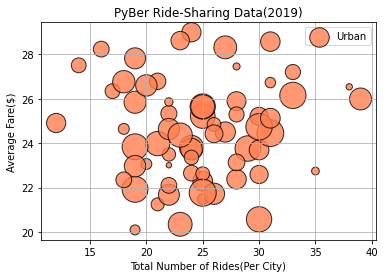

In [61]:
#Build the scatter plots for urban cities
#alpha es por transparencia
plt.scatter(urban_ride_count,
            urban_fare_average,
            s=10*urban_driver_average,
            edgecolor="black",linewidths=1,
            alpha=0.8,
            color="coral",
            label="Urban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
plt.legend()

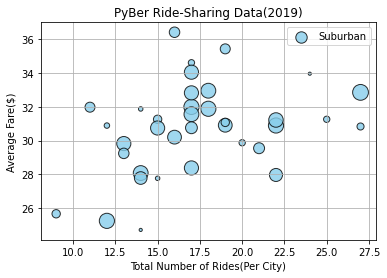

In [62]:
#Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,
            suburban_fare_average,
            s=10*suburban_driver_average,
            edgecolor="black",linewidths=1,
            alpha=0.8,
            color="skyblue",
            label="Suburban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
plt.legend()

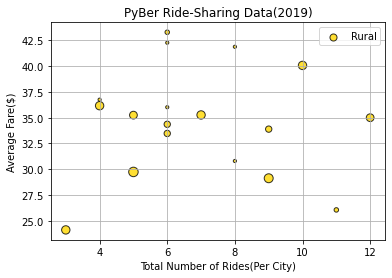

In [63]:
#Build the scatter plots for suburban cities
plt.scatter(rural_ride_count,
            rural_fare_average,
            s=10*rural_driver_average,
            edgecolor="black",linewidths=1,
            alpha=0.8,
            color="gold",
            label="Rural")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
plt.legend()

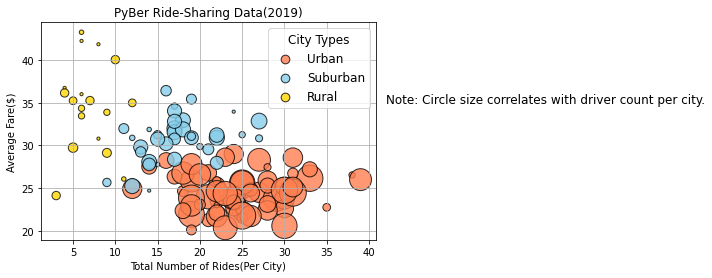

In [71]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_fare_average,
      s=10*urban_driver_average, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_fare_average,
      s=10*suburban_driver_average, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_fare_average,
      s=10*rural_driver_average, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)
plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()